# **Student Score Prediction Based on Study Hours**


---
In this project, **I will analyze data related to students' study hours and the scores they earn**. **The main objective** of this analysis is **to build a prediction model** that can estimate students's scores based on their number of study hours.


### **Import Libraries and Dataset**

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import numpy as np

# Load dataset
data = pd.read_csv('student_scores.csv')

The first step is **to import some important libraries and load the dataset**. I **use** the **pandas library** for manipulation data, matplotlib and seaborn for **data visualization**, scikit-learn for **modelling and evaluation machine learning**, and scipy for **handling outliers with zscore**.

### **Summary Dataset**

In [9]:
# Initial Data Exploration
# Display the first few rows of the dataset
print(data.head())

# Display general information about the dataset
print(data.info())

# Display descriptive statistics
print(data.describe())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


[IND] Langkah ini adalah untuk menampilkan beberapa baris pertama dari dataset, menampilkan informasi umum tentang dataset, dan menampilkan statistik deskriptif dari dataset untuk membantu memahami distribusi data dan mengidentifikasi potensi outlier.

---
[ENG] This step is **to display the first few rows of the dataset, show general information about dataset, and display descriptive statistics of the dataset** to help understand the data distribution and identify potential outliers.


## Missing Values

In [10]:
# Check missing values
print("")
print(data.isnull().sum())

# Check duplicate data
print("\nDuplicated data: ")
print(data.duplicated().sum())
data.shape

# Handling Missing Values (If there is)
# data = data.drop_duplicates()


Hours     0
Scores    0
dtype: int64

Duplicated data: 
0


(25, 2)

[IND] Selanjutnya, kita periksa apakah ada nilai yang hilang atau nilai yang duplikat dalam dataset tersebut.

---
[ENG] Next, we **check if there any missing values or duplicate values in thedataset**.


## **Data Preparation**

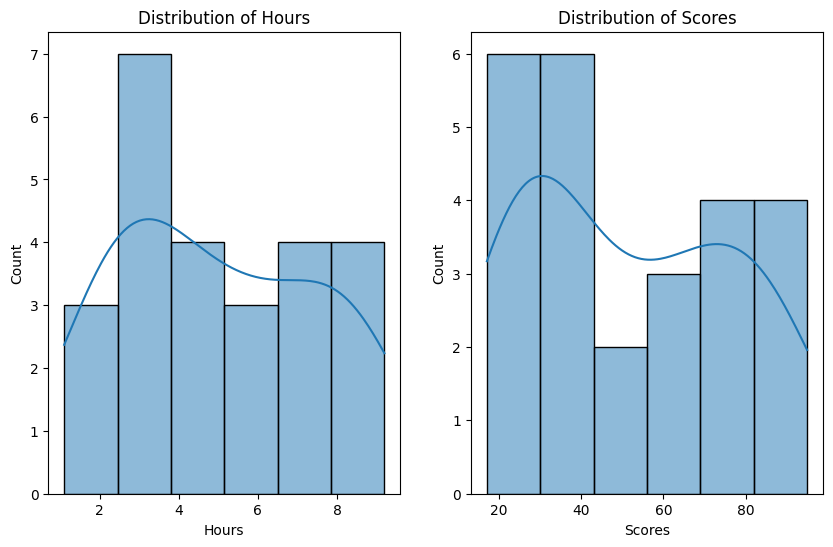

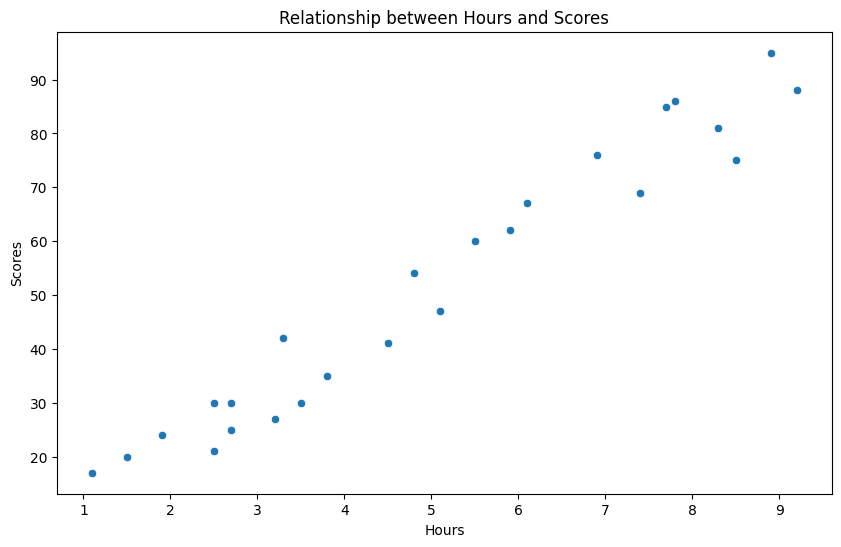

In [11]:
# Check distribution data hours and scores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Hours'], kde=True)
plt.title('Distribution of Hours')

plt.subplot(1, 2, 2)
sns.histplot(data['Scores'], kde=True)
plt.title('Distribution of Scores')
plt.show()

# Visualization plot Hours vs Scores
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Hours', y='Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Relationship between Hours and Scores')
plt.show()

[IND] Tahap ini kita membuat histogram 'Hours' dan 'Scores' untuk memahami distribusi data. Distribusi data digunakan untuk membantu kita melihat tren dan pola tertentu. Kemudian, scatter plot dibuat untuk melihat hubungan antara jumlah jam belajar ('Hours') dan skor yang diperoleh ('Scores').


---
[ENG] At this step **we create histograms of 'Hours' and 'Scores' to understand data distribute**. Data distribute is **used to help us see certain trends and patterns.** Then, the scatter plot is created **to see the relationship between the number of study hours and the score obtained.**


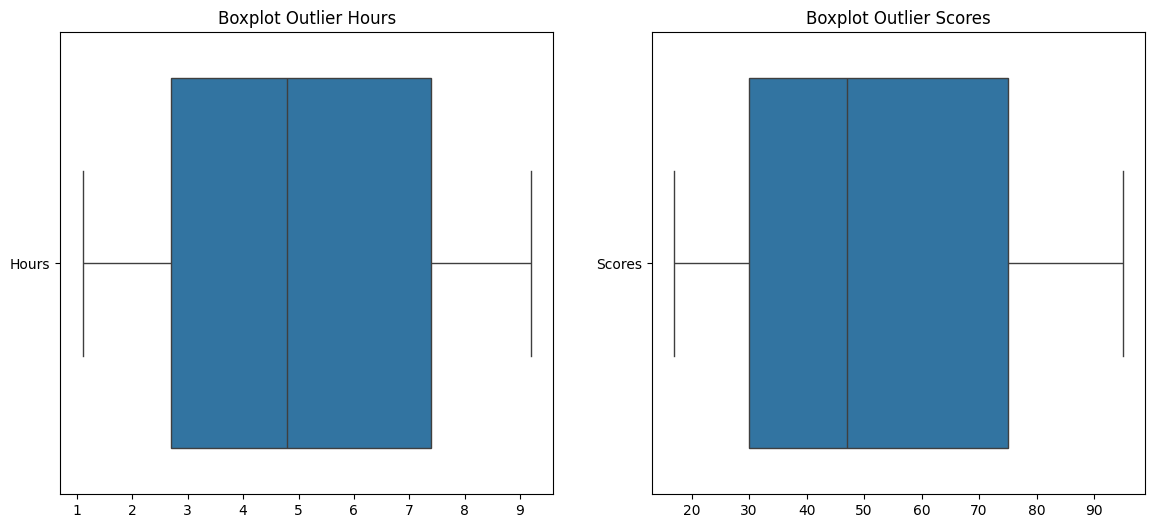

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


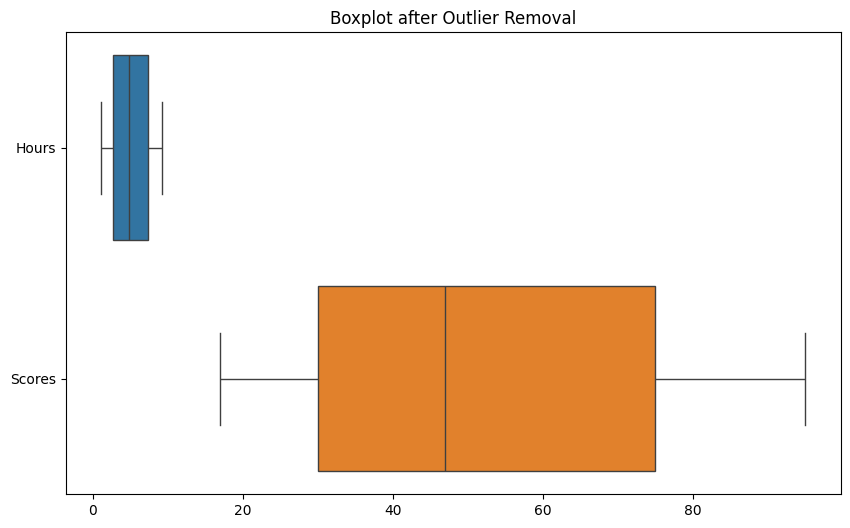

In [12]:
# Check outliers with Boxplot
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=data[['Hours']], orient='h')
plt.title('Boxplot Outlier Hours')

plt.subplot(1,2,2)
sns.boxplot(data=data[['Scores']], orient='h')
plt.title('Boxplot Outlier Scores')
plt.show()

# Handling outliers with zscore
data['zscore_Hours'] = zscore(data['Hours'])
data['zscore_Scores'] = zscore(data['Scores'])

data_clean = data[(np.abs(data['zscore_Hours']) < 3) & (np.abs(data['zscore_Scores']) < 3)]
data_clean = data_clean.drop(columns=['zscore_Hours', 'zscore_Scores'])

# Check data cleaned
print(data_clean.describe())

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean, orient='h')
plt.title('Boxplot after Outlier Removal')
plt.show()

[IND] Selanjutnya, disini kita periksa apakah ada outlier dalam data menggunakan boxplot. Untuk handling outlier, kita menggunakan metode z-score yang telah di import dari **library scipy.stats**. Nilai dengan z-score lebih besar dari 3 atau kurang dari -3 dianggap sebagai outlier dan dihapus dari dataset. Setelah outlier dihapus, kita cek dan tampilkan kembali dari data yang telah dibersihkan.

---
[ENG] Next, here we check if there are outliers in the data using boxplots. For handling outliers, we use z-score method that has been imported from **library scipy.stats**. Values with z-score greater than 3 or less than -3 are considered as outliers and removed from the dataset. After the outliers are removed, we check and display the cleaned data again.

## Splitting Data

In [13]:
# Separating features and targets
x = data_clean[['Hours']]
print(x.head())

y = data_clean[['Scores']]
print(y.head())

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 42)

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
   Scores
0      21
1      47
2      27
3      75
4      30


[IND] Setelah membersihkan data, kita akan memisahkan data menjadi fitur (jumlah jam belajar) dan target (skor yang diperoleh). Ini penting untuk persiapan data sebelum melakukan pemodelan pembelajaran mesin.
Selanjutnya, membagi data menjadi data pelatihan dan data pengujian. Data pelatihan digunakan untuk melatih model, sedangkan data pengujian digunakan untuk mengevaluasi kinerja model. Disini, kita menggunakan 67% data untuk pelatihan dan 33% data untuk pengujian.

---
[ENG] After cleaning the data, we separate the feature (number of study hours) and the target (score obtained). T**his is important for data preparation before performing machine learning modeling.**
Next, divide the data into training data and testing data. Training data is used to train the model, while the testing data is used to evaluate the performance of the model. Here, **we use 67% data for training and 33% data for testing.**

## Modelling - Regresi Linear

In [14]:
# Train model linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict with regresi linear
y_pred_linear = linear_model.predict(X_test)

# Evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display
print(f'Linear Regression Coefficient: {linear_model.coef_[0]}')
print(f'Linear Regression Intercept: {linear_model.intercept_}')
print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Linear Regression R-squared: {r2_linear}')

Linear Regression Coefficient: [9.65029083]
Linear Regression Intercept: [3.40503018]
Linear Regression Mean Squared Error: 24.074686364260987
Linear Regression R-squared: 0.9435488190277577


[IND]
Tahap ini, kita lakukan modeling dengan menggunakan Regresi Linear. Model ini digunakan untuk menemukan hubungan linier antara jumlah jam belajar dengan skor yang diperoleh. Setelah melatih model dengan data pelatihan, selanjutnya data tersebut akan digunakan untuk membuat prediksi pada data pengujian. Setelah itu, menghitung metrik evaluasi menggunakan Mean Squared Error (MSE) dan R-squared (R²) untuk menilai kinerja model.

---

[ENG] At this step, **we modeling using linear Regression**. This model **is used to find a linear relationship between the number of hours study and the score obtained**. After training model with the training data, the data will be used to make predictions on the test data. After that, **calculate evaluation metrics using Mean Squared Error (MSE) and R-squared (R²)** to assess the performance of the model.

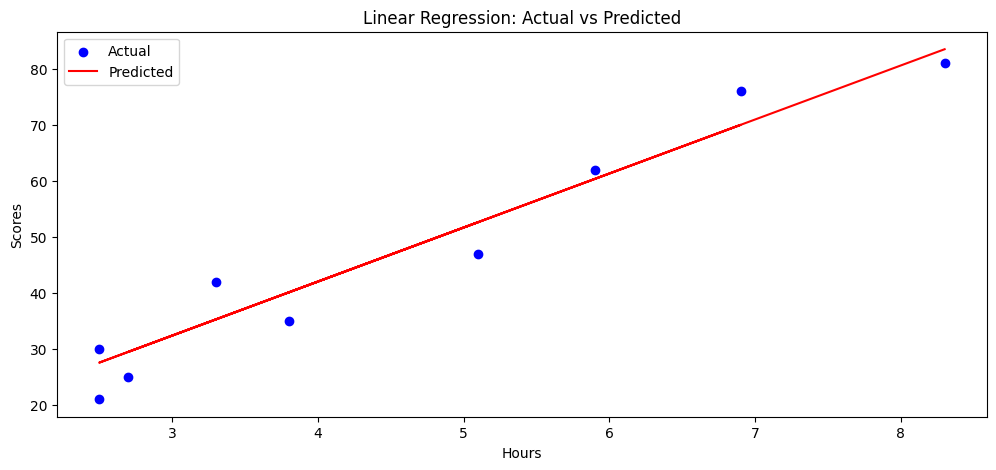

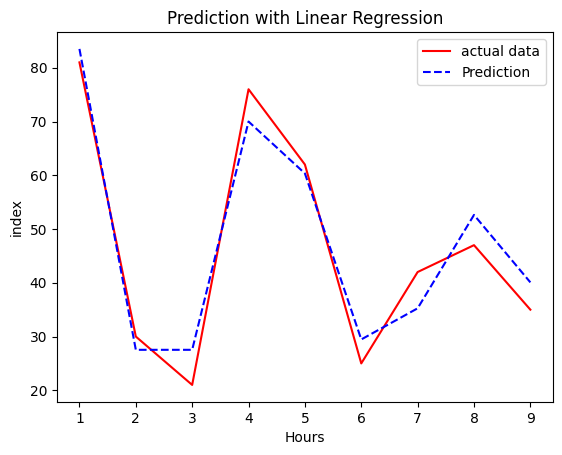

In [15]:
# Visualization the comparison of actual vs predicted values
plt.figure(figsize=(12, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Plot to find out if the prediction is correct.
# y_test compare to y_pred_linear
c=[i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred_linear,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

[IND] Kita visualisasikan dengan cara membuat plot yang membandingkan nilai aktual dan nilai prediksi. Tujuannya untuk memahami seberapa baik model dalam memprediksi skor berdasarkan jumlah jam belajar. Dalam grafik tersebut, terlihat prediksi mengikuti pola data aktual yang cukup baik dan tidak terlalu renggang, hanya perbedaan kecil yang konsisten di sepanjang grafik.

---

[ENG]
We visualize it by making a plot comparing actual score and predicted score. **The purpose is to understand how well the model predicts scores based on the number of hours studied.** In this graph, it can be seen the prediction follows the actual data well and are not too stretched out. There are only small differences that are consistent throughout the graph.

##Modelling - Decision Tree

In [16]:
# Train model
tree_model =  DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict with DT
y_pred_tree = tree_model.predict(X_test)

# Evalution model DT
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Display
print(f'Decision Tree Regression Mean Squared Error: {mse_tree}')
print(f'Decision Tree Regression R-squared: {r2_tree}')

Decision Tree Regression Mean Squared Error: 57.22222222222222
Decision Tree Regression R-squared: 0.8658232978230662


[IND]

Tahap ini dilakukan model Decision Tree untuk membandingkan hasilnya dengan Regresi Linear. Terlihat, hasil kinerja model dengan decision tree yang diperoleh hanya 0.8658232978230662 lebih kecil daripada menggunakan regresi linear.

---

[ENG]
In this step, a Decision Tree model is performed to compare the results with Linear Regression. It can be seen that the performance result of the model with the decision tree obtained is only 0.865 smaller than using Linear Regression.

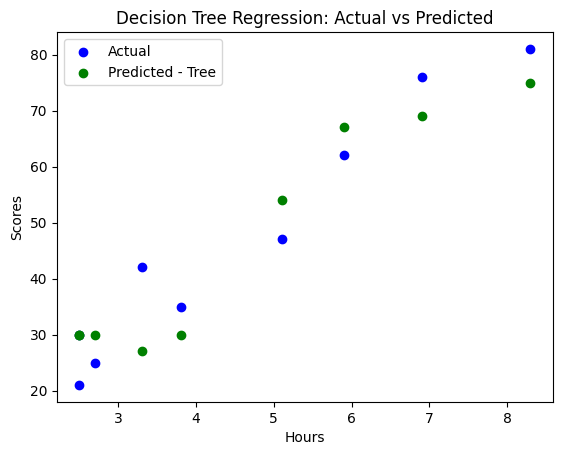

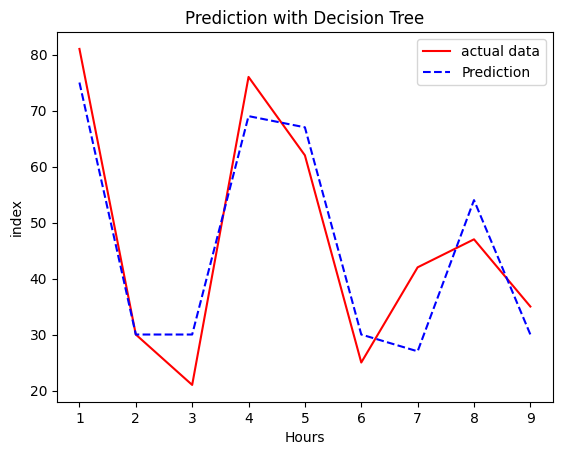

In [17]:
# Visualize actual vs predicted decision tree model
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_tree, color='green', label='Predicted - Tree')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Plot to find out if the prediction is correct.
# y_test compare to y_pred_linear
c=[i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred_tree,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

[IND] Kita juga memvisualisasikan hasil model decision tree dengan membandingkan nilai aktual dan nilai prediksi. Pada grafik Decision Tree, prediksi mengikuti pola data aktual dengan baik di beberapa jam, tetapi memiliki fluktuasi yang besar di jam lainnya. Misalnya, perbedaan yang cukup besar di jam 6, 7, dan 8.


---

[ENG] We also visualize the results of the decision tree model by comparing the actual scores and predicted scores. In the Decision Tree graph, the prediction follows the actual data pattern well in some hours, but has large fluctuations in others. For example, there are considerable difference at 6, 7, and 8 o'clock.

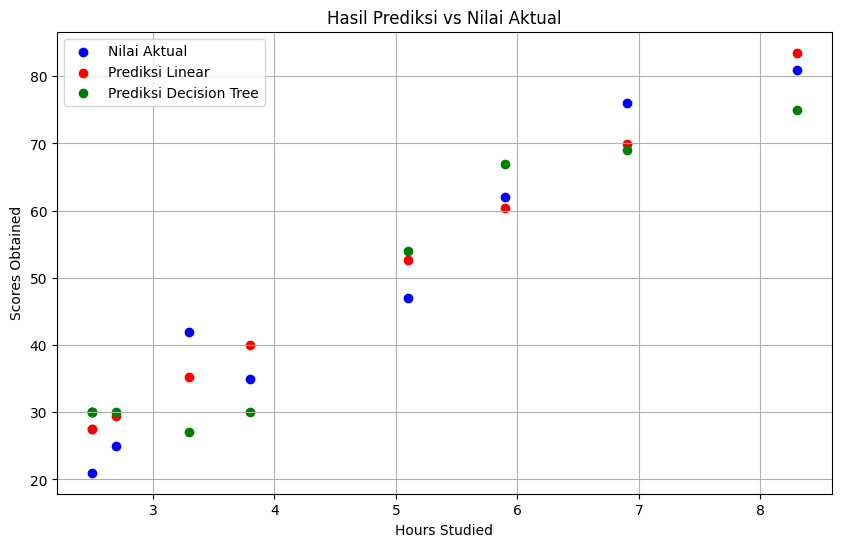

Perbandingan Model:
Regresi Linear - MSE: 24.074686364260987 R^2: 0.9435488190277577
Decision Tree - MSE: 57.22222222222222 R^2: 0.8658232978230662


In [21]:
# Visualisasi hasil prediksi vs nilai aktual untuk regresi linear dan decision tree terbaik
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Nilai Aktual')
plt.scatter(X_test, y_pred_linear, color='red', label='Prediksi Linear')
plt.scatter(X_test, y_pred_tree, color='green', label='Prediksi Decision Tree')
plt.title('Hasil Prediksi vs Nilai Aktual')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.grid(True)
plt.show()

# Perbandingan kinerja model
print("Perbandingan Model:")
print("Regresi Linear - MSE:", mse_linear, "R^2:", r2_linear)
print("Decision Tree - MSE:", mse_tree, "R^2:", r2_tree)


[IND]
Terakhir, kita membandingkan kinerja kedua model (regresi linear dan decision tree) dengan memvisualisasikan hasil prediksi dan menghitung metrik evaluasi. Ini membantu kita menentukan model mana yang lebih baik dalam memprediksi skor berdasarkan jumlah jam belajar.

---

[ENG]
Finally, we compare the performance of both models by visualizing the prediction results and calculating the metrics evaluation. **This helps us for determine which model is better** at predicting scores based on the number of study hours.   

## **Conclusion**

[IND] Berdasarkan hasil di atas, model Regresi Linier lebih baik karena memiliki nilai Mean Squared Error (MSE) yang lebih rendah dan nilai R-squared (R²) yang lebih tinggi dibandingkan dengan Regressor Decision Tree. Nilai MSE yang lebih rendah mengindikasikan bahwa hasil prediksi lebih mendekati nilai aktual, dan nilai R² yang lebih tinggi mengindikasikan kecocokan model dengan data yang lebih baik.

---

[ENG] Based on the above results, the **Linear Regression model is better** because it has a lower Mean Squared Error (MSE) and a higher R-squared (R²) value compared to the Decision Tree Regressor. **The lower MSE indicates that the predictions are closer to the actual values, and the higher R² indicates a better fit of the model to the data.**